In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
train.drop(['keyword','location'],axis=1,inplace=True)

In [ ]:
train.to_csv("train2.csv")

In [ ]:
blanks = []

In [ ]:
for i in train.index:
  if train['text'][i].isspace():
    blanks.append(i)
len(blanks)

0

In [ ]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

Balancing the classes

In [ ]:
from sklearn.utils import resample

In [ ]:
pos = train[train['target'] == 1]
neg = train[train['target'] == 0]

In [ ]:
neg_down = resample(neg,replace=False,    
                    n_samples=3271,   
                    random_state=1983)

In [ ]:
balanced = pd.concat([neg_down, pos])

In [ ]:
balanced['target'].value_counts()

1    3271
0    3271
Name: target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = balanced['text']
y = balanced['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1983)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
clf = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[835 241]
 [236 847]]


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1076
           1       0.78      0.78      0.78      1083

    accuracy                           0.78      2159
   macro avg       0.78      0.78      0.78      2159
weighted avg       0.78      0.78      0.78      2159



In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, pred))

0.779064381658175


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

In [ ]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
predictions = text_clf_nb.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))
print('\n')
print(metrics.classification_report(y_test,predictions))

[[888 188]
 [267 816]]


              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1076
           1       0.81      0.75      0.78      1083

    accuracy                           0.79      2159
   macro avg       0.79      0.79      0.79      2159
weighted avg       0.79      0.79      0.79      2159



In [ ]:
prediction = text_clf_nb.predict(test['text'])

In [ ]:
prediction

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
submission =  pd.read_csv("/content/sample_submission.csv")
submission['target'] = (prediction > 0.5).astype(int)

submission.to_csv("submission_NB.csv", index=False, header=True)

Cleaning and stemming the data

In [ ]:
!pip3 install transformers
!pip3 install emoji

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel


from sklearn.metrics import accuracy_score 
import numpy as np
from time import time
from nltk.tokenize import WordPunctTokenizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

import time 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import re
# Natural Language Tool Kit 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import transformers
import emoji
import string

import seaborn as sns

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
my_stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_punc(text):
    # Dealing with Punctuation
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
def data_cleaner(text):        
    lower_case = text.lower()
    tokens=word_tokenize(lower_case)
    return (" ".join(tokens)).strip()

def remove_stopwords (text):        
    list1=[word for word in text.split() if word not in stopwords.words('english')]
    return " ".join(list1)

In [ ]:
train['text']=train['text'].apply(lambda x : remove_punc(x))
train['text'] = train['text'].apply(lambda x : data_cleaner(x))
train['text'] = train['text'].apply(lambda x : remove_stopwords(x))

In [ ]:
test['text'] = test['text'].apply(lambda x : remove_punc(x))
test['text'] = test['text'].apply(lambda x : data_cleaner(x))
test['text'] = test['text'].apply(lambda x : remove_stopwords(x))

In [ ]:
stemmer = PorterStemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return ' '.join(text)

train['text'] = train['text'].apply(stemming)

In [ ]:
test['text'] = test['text'].apply(stemming)

In [ ]:
X = train['text']
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1983)

In [ ]:
t0 = time.time()

In [ ]:
def acc_summary(pipeline, x_train, y_train, x_test, y_test):
    t0 = time.time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(X_test)
    train_test_time = time.time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    print("train and test time: {0:.2f}s".format(train_test_time))
    return accuracy,train_test_time

tvec = TfidfVectorizer()
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)

tvec = TfidfVectorizer()
def classifier_comparator(vectorizer=tvec, n_features=10000, stop_words=None, ngram_range=(1, 1), classifier=zipped_clf):
    result = []
    vectorizer.set_params(stop_words=stop_words, max_features=n_features, ngram_range=ngram_range)
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc,tt_time = acc_summary(checker_pipeline, X_train, y_train, X_test, y_test)
        result.append((n,clf_acc,tt_time))
    return result

In [ ]:
trigram_result = classifier_comparator(n_features=100000,ngram_range=(1,3))

Validation result for Logistic Regression
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy score: 78.99%
train and test time: 1.05s
Validation result for Linear SVC
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
accuracy score: 79.27%
train and test time: 0.38s
Validation result for LinearSVC with L1-based feature selection
Pipeline(memory=None,
         steps=[('feature_selection',
                 SelectFromModel(estimator=LinearSVC(C=1.0, class_weight=None,
                                                     dual=False,
 

In [ ]:
trigram_result

[('Logistic Regression', 0.7898925586947871, 1.0527551174163818),
 ('Linear SVC', 0.7926780740151214, 0.3827860355377197),
 ('LinearSVC with L1-based feature selection',
  0.7656187823318743,
  0.4436225891113281),
 ('Multinomial NB', 0.7918822124950259, 0.35186219215393066),
 ('Bernoulli NB', 0.7198567449263829, 0.36905765533447266),
 ('Ridge Classifier', 0.7910863509749304, 0.45841336250305176),
 ('AdaBoost', 0.7341822522881019, 1.6990208625793457),
 ('Perceptron', 0.7508953442101074, 0.4148750305175781),
 ('Passive-Aggresive', 0.7803422204536411, 0.42601823806762695),
 ('Nearest Centroid', 0.7827298050139275, 0.3767516613006592)]

In [ ]:
def prediction(pipeline, x_train, y_train,testtext):
    t0 = time.time()
    sentiment_fit = pipeline.fit(X_train, y_train)
    y_pred = sentiment_fit.predict(testtext)
    return y_pred

In [ ]:
vectorizer=TfidfVectorizer()
checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', LinearSVC())
        ])
vectorizer.set_params(stop_words=None, max_features=10000, ngram_range=(1,4))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=10000,
                min_df=1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
prediction = prediction(checker_pipeline,X_train,y_train,test['text'])

In [ ]:
submission =  pd.read_csv("/content/sample_submission.csv")

In [ ]:
submission['target'] = (prediction > 0.5).astype(int)

submission.to_csv("submission_SVC.csv", index=False, header=True)

With Fastai

In [ ]:
import fastai
from fastai import *
from fastai.text import *

In [ ]:
train2 = pd.read_csv('/content/train2.csv')
train2.isnull().sum()

Unnamed: 0    0
id            0
text          0
target        0
dtype: int64

In [ ]:
path=Path('/content/')

In [ ]:
df= pd.read_csv(path/"train2.csv", encoding='latin-1',index_col=0)
df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df = df.iloc[np.random.permutation(len(df))]

In [ ]:
cut1 = int(0.8 * len(df)) + 1
df_train, df_valid = df[:cut1], df[cut1:]

In [ ]:
data_lm = TextLMDataBunch.from_df(path=path,
 train_df=df_train,
 valid_df=df_valid, 
 label_cols='target', 
 text_cols='text')

In [ ]:
lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [ ]:
lm.save_encoder(path/'lm')

In [ ]:
data_clas=TextClasDataBunch.from_df(path=path,train_df=df_train, valid_df=df_valid, 
                                    vocab=data_lm.train_ds.vocab, label_cols='target', text_cols='text')

In [ ]:
clas = text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.3)

In [ ]:
clas.load_encoder(path/'lm')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6091 items)
x: TextList
xxbos xxmaj guys . i have an xxmaj xxunk xxmaj who xxmaj is n't xxmaj actually xxmaj related to xxmaj me by xxmaj blood .,xxbos xxunk make natural disaster reporting more interesting by adding ' xxmaj the ' to headlines such as ' xxmaj rescuers are xxunk through the wreckage ',xxbos 70 xxmaj years xxmaj after xxmaj atomic xxmaj bombs xxmaj japan xxmaj still xxmaj struggles xxmaj with xxmaj war xxmaj past : xxmaj the anniversary of the devastation wrought b ... http : / / t.co / xxunk,xxbos xxmaj the xxmaj pak terrorist who has been caught alive must be tried fast not delayed as xxunk must send very hard message to xxmaj pak instead of xxmaj xxunk,xxbos xxmaj for some reason knocking on someone 's door at 3 am in a snowstorm while wearing xxunk xxunk is not the best way to get into their bathroom
y: CategoryList
0,0,1,1,0
Path: /content;

Valid: LabelList (1522 items)
x: TextList
xxbos xxmaj this past week has

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.20E-03
Min loss divided by 10: 5.75E-03


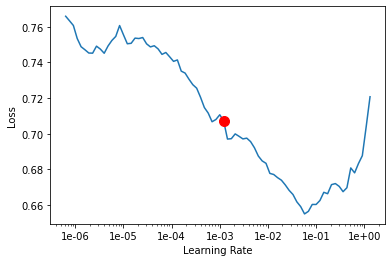

In [ ]:
clas.freeze()

clas.lr_find()
clas.recorder.plot(suggestion=True)

In [ ]:
best_clf_lr = clas.recorder.min_grad_lr
best_clf_lr

0.001202264434617413

In [ ]:
LM_LR = 0.001202264434617413

clas.fit_one_cycle(cyc_len=1, max_lr=LM_LR, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.573852,0.492240,0.772668,00:07


In [ ]:
clas.save_encoder('clas_enc')

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-06
Min loss divided by 10: 3.31E-07


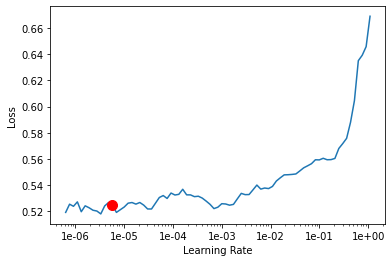

In [ ]:
clas.freeze_to(-2)
clas.lr_find()
clas.recorder.plot(suggestion=True)

In [ ]:
best_clf_lr = clas.recorder.min_grad_lr
best_clf_lr

5.754399373371569e-06

In [ ]:
LM_LR = 5.754399373371569e-06

clas.fit_one_cycle(1, slice(LM_LR/(2.6**4),LM_LR), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.537790,0.490089,0.773982,00:08


In [ ]:
clas.save_encoder('clas_enc2')

In [ ]:
clas.load_encoder('clas_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6091 items)
x: TextList
xxbos @wocowae xxmaj police xxmaj officer xxmaj wounded xxmaj suspect xxmaj dead xxmaj after xxmaj exchanging xxmaj shots http : / / t.co / xxunk ushed,xxbos xxmaj traumatised after seeing a baby literally fall out of that lady . xxmaj she only went for a wee great catch ! # xxunk,xxbos # hot xxup c-130 specially modified to land in a stadium and rescue hostages in xxmaj iran in 1980 http : / / t.co / xxunk # prebreak # best,xxbos xxmaj strong xxmaj thunderstorm 4 xxmaj miles xxmaj north of xxmaj japton xxmaj moving xxup se xxmaj at 25 xxup mph . xxmaj large xxmaj hail and xxmaj wind xxmaj gusts xxmaj up to 50 xxup mph xxmaj poss ... # arwx http : / / t.co / xxunk,xxbos xxmaj there might be casualties tomorrow
y: CategoryList
1,0,1,1,1
Path: /content;

Valid: LabelList (1522 items)
x: TextList
xxbos xxmaj we know this is bad for the bees - do n't give in to pressure from short term profit xxunk chemical compa

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07
Min loss divided by 10: 5.25E-04


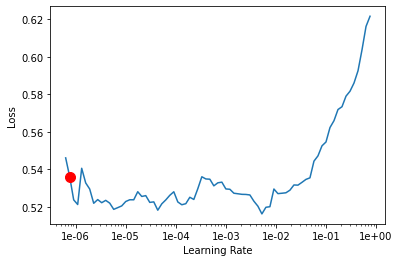

In [ ]:
clas.freeze_to(-3)
clas.lr_find()
clas.recorder.plot(suggestion=True)

In [ ]:
best_clf_lr = clas.recorder.min_grad_lr
best_clf_lr

7.585775750291837e-07

In [ ]:
LM_LR = 7.585775750291837e-07

clas.fit_one_cycle(1, slice(LM_LR/(2.6**4),LM_LR), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.535832,0.489549,0.772668,00:13


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 2.29E-05


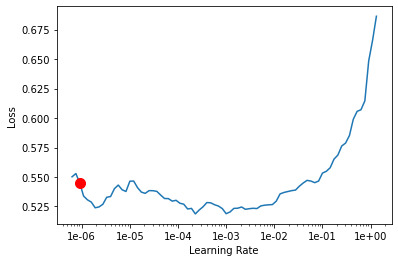

In [ ]:
clas.unfreeze()
clas.lr_find()
clas.recorder.plot(suggestion=True)

In [ ]:
best_clf_lr = clas.recorder.min_grad_lr
best_clf_lr

9.120108393559096e-07

In [ ]:
LM_LR = 9.120108393559096e-07

clas.fit_one_cycle(4, slice(LM_LR/(2.6**4),LM_LR), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.525423,0.489547,0.773325,00:17
1,0.526964,0.489433,0.772668,00:17
2,0.529958,0.488184,0.774639,00:17
3,0.528584,0.491406,0.772011,00:17


In [ ]:
clas.save('clas')
clas.save_encoder('clas_enc3')

In [ ]:
from fastai.vision import * 

In [ ]:
preds, y, losses = clas.get_preds(with_loss=True)

In [ ]:
interp = ClassificationInterpretation(clas,preds,y,losses)

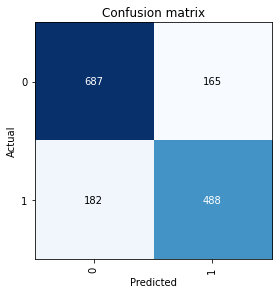

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
predictions_kaggle = []
for i in test.index:
  predictions_kaggle.append(clas.predict(test["text"][i]))

In [ ]:
pd.DataFrame(predictions_kaggle)[0].to_csv("fastai.csv",index=False)

With BERT

In [ ]:
pip install bert-for-tf2

In [2]:
import bert

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint


from bert import bert_tokenization

In [4]:
import tensorflow_hub as hub

In [5]:
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

def build_model(bert_layer, max_len=512):
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(clf_output)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
%%time
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/1"
bert_layer = hub.KerasLayer(module_url, trainable=True)

CPU times: user 23.1 s, sys: 4.55 s, total: 27.7 s
Wall time: 42.8 s


In [7]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
submission = pd.read_csv("/content/sample_submission.csv")

In [8]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = bert_tokenization.FullTokenizer(vocab_file, do_lower_case)

In [9]:
train_input = bert_encode(train.text.values, tokenizer, max_len=160)
test_input = bert_encode(test.text.values, tokenizer, max_len=160)
train_labels = train.target.values

In [10]:
model = build_model(bert_layer, max_len=160)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 1024), (None 335141889   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [11]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

train_history = model.fit(
    train_input, train_labels,
    validation_split=0.2,
    epochs=3,
    callbacks=[checkpoint],
    batch_size=16
)

Epoch 1/3
381/381 [==============================] - 708s 2s/step - loss: 0.4278 - accuracy: 0.8135 - val_loss: 0.3707 - val_accuracy: 0.8437
Epoch 2/3
381/381 [==============================] - 636s 2s/step - loss: 0.2876 - accuracy: 0.8880 - val_loss: 0.3731 - val_accuracy: 0.8444
Epoch 3/3
381/381 [==============================] - 641s 2s/step - loss: 0.1686 - accuracy: 0.9335 - val_loss: 0.4779 - val_accuracy: 0.8352


In [12]:
model.load_weights('model.h5')
test_pred = model.predict(test_input)

In [13]:
submission['target'] = test_pred.round().astype(int)
submission.to_csv('submission_bert.csv', index=False)